In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import itertools


Populating the interactive namespace from numpy and matplotlib


In [2]:
def make_2DGaussXOR(n_samples):
    n = int(n_samples / 4)
    std = 0.25
    
    c = np.array(list(itertools.product([0.5, -0.5], repeat=2)))
    z = np.full(shape=2, fill_value=n)

    X1,_ = datasets.make_blobs(n_samples=z, n_features=2, centers=c[[0,3], :], cluster_std=std)
    X2,_ = datasets.make_blobs(n_samples=z, n_features=2, centers=c[[1,2], :], cluster_std=std)
    y1 = np.ones(n*2)
    y2 = np.zeros(n*2)

    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, y2))

    return X,y

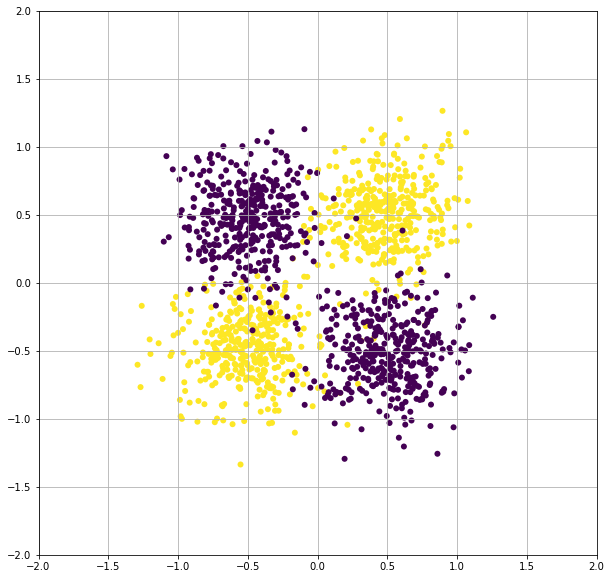

In [3]:
X,y = make_2DGaussXOR(1500)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y, edgecolor='none');
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.grid(which='major', axis='both')

In [4]:
def make_nDGaussXOR(n_samples, n_dimensions):
    f = n_dimensions
    n = int(n_samples / f)
    c = np.array(list(itertools.product([0.5, -0.5], repeat=f)))
    
    for i in range(2**f):
        X1,_ = datasets.make_blobs(n_samples=n, n_features=f, centers=c[i, :].reshape(1, -1), cluster_std=0.25)
    
        d = c[i]
        if len(d[d < 0]) % 2 == 0:
            y1 = np.ones(n)
        else:
            y1 = np.zeros(n)
    
        if i == 0:
            X, y = X1, y1
        else:
            X,y = np.concatenate((X, X1)), np.concatenate((y, y1))
        
    return X,y

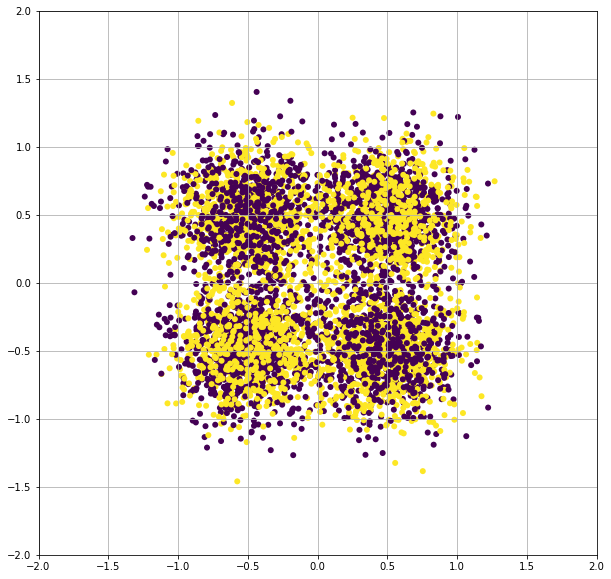

In [5]:
X,y = make_nDGaussXOR(1500, 4)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y, edgecolor='none');
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.grid(which='major', axis='both')

In [6]:
m = X.T.mean(axis=1) # calculate the mean of each row
m = m[:, np.newaxis] # reshape the mean
M = X.T - m # normalization
C = M.dot(M.T) / (M.shape[1] - 1) # calculate the covariance matrix 

print('\nCovariance Matrix: \n')
print(C)
print('\nMean: \n')
print(m)


Covariance Matrix: 

[[ 0.30894603  0.00204608  0.00131449  0.00542366]
 [ 0.00204608  0.30797566 -0.00183946  0.00273655]
 [ 0.00131449 -0.00183946  0.31661697  0.00316048]
 [ 0.00542366  0.00273655  0.00316048  0.31079658]]

Mean: 

[[ 0.00038869]
 [ 0.00132656]
 [-0.00394434]
 [ 0.00097709]]
